# Simple Linear Regression
##### In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable

> ##### We are using a csv file called `advertising.csv` as our data source

Outline:
1. Reading and Understanding the Data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating the model on the test set

#### 1. Import `numpy` and `pandas` for data extraction and cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read the dataset
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The first three (3) columns - TV, Radio and Newspaper are the predictor variables (Adverts made) and the last column `Sales` is our target variable (how the various forms of adverts affected sales)

In [3]:
# check the size of the dataset
advertising.shape

(200, 4)

(200,4) means the dataset consists of 200 rows or observations and 4 columns/fields/features

In [4]:
# check to see any null values
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


So far, so good.
Our data has every cell populated with a value

In [5]:
# check summary statistics of datasets
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### 2. Import visualization tools like `matplotlib` and `seaborn`

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

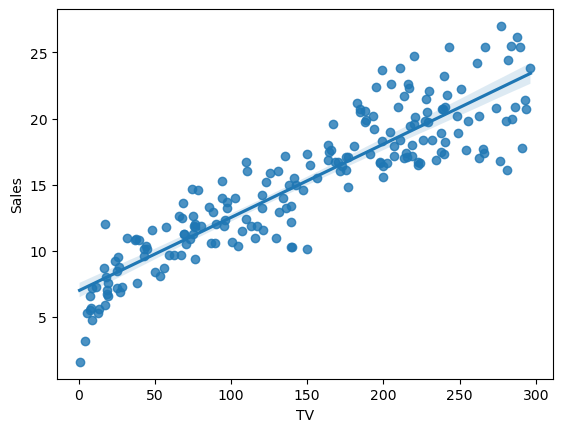

In [40]:
# visualize the data
# use regplot to do regression plotting 
sns.regplot(x='TV', y='Sales', data=advertising)

You can change the `x` parameter to `Radio` and `Newspaper` and run the cell to see the different plottings.
With Radio and Newspaper, the data points are scattered as compared to TV.

Let's use `pairplot` to do a proper comparison.

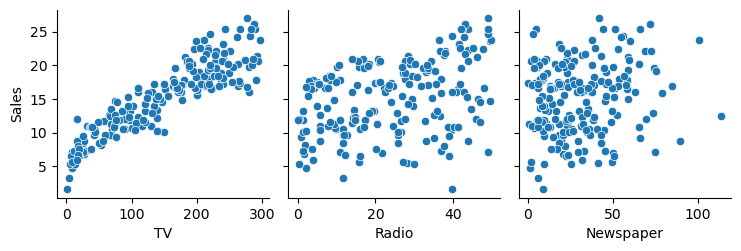

In [8]:
# use pairplot to do all three visualizations at once
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

From observation, you can see that it will be best to build the model based on `TV` since its points are well-clustered unlike `Radio` and `Newspaper` which has very dispersed data points.
Do remember that we are trying to build a linear model and data points that are well-clustered together like `TV` expresses a high confidence that our model can be reliable.

In [9]:
# check correlation
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

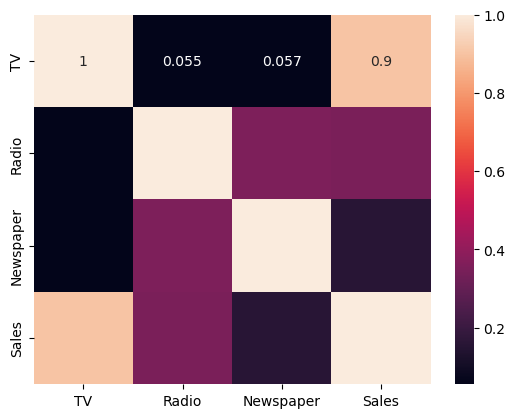

In [11]:
# use heatmap to visualize the correlation
sns.heatmap(advertising.corr(), annot=True)

#### 2. Perform a Simple Linear Regression using `statsmodels` library
\begin{equation}
y = c + m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n}
\end{equation}
> $y$ is the response
> $c$ is the intercept
> $m1$ is the coefficient for the first feature
> $mn$ is the coefficient for the nth feature

In our case:
\begin{equation}
y = c + m_{1} \times TV
\end{equation}
The $m$ values are called the model coefficients or model parameters.

In [17]:
# import statsmodels library and sci-kit learn to build model

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

#### Steps:
- Create X and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [18]:
# create X and y

X = advertising['TV']
y = advertising['Sales']

In [34]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# it gives 70% of 200 observations
X_train.shape

# view data in X_train
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [32]:
# training the model
# using statsmodels
# statsmodel by default does not include `c` intercept
# it only includes the coefficient of the predictor variable `m`
# add a constant or intercept explicitly
# create a new X_train variable for statsmodels to add the constant
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


statsmodels:
$y = c.const + m_{1} \times TV$

In [35]:
# fitting the model
# create a linear regression object variable
lr = sm.OLS(y_train, X_train_sm)

# create a model variable to fit lr
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

> Coefficient of `const` (intercept) and coefficient of `TV` printed above
> $ Sales = 6.948683 + 0.054546 \times TV $
>
> Interpretation: a **positive** correlation exists between `TV` and `Sales`. As `TV` advertisement increases, `Sales` increases. Even when TV advertisement is stopped (i.e $0$), Sales will still maintain $6.948683$ figure.

In [36]:
# access the rest of the details from the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.52e-52
Time:                        11:41:22   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One of the benefits of `statsmodels` library is the detailed summary presented above.
Although `sci-kit learn` is great, it does not give such detailed summary about the data.
> Users from Mathematics and Statistics background will prefer `statsmodels` as a better alternative to `sci-kit learn` which mostly users from programming background prefer.

The $p-value$ of the summary is $0$ which means the data is significant.

The $R-squared$ value explains that about $81$ per cent $= 0.816$ of the variance in `Sales` is explained by the model which is pretty good. <br>
**NB: Take note that Correlation is not equal to Causation** <br>
The $F-statistic$ is low ($1.52 \times 10^{-52}$ is lesser than $0.05$) => the fit is not by chance

<function matplotlib.pyplot.show(close=None, block=None)>

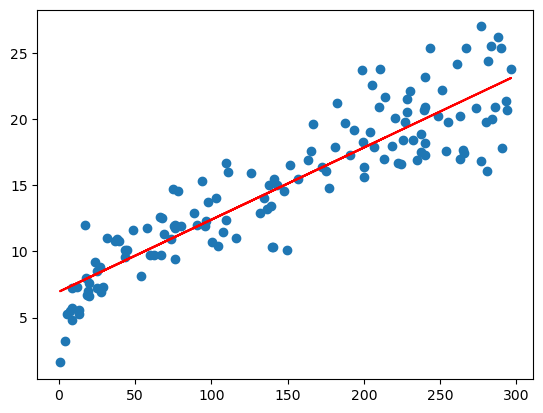

In [41]:
# model evaluation
# visualize the training dataset
plt.scatter(X_train, y_train)

# visualize predicted regression line
plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
plt.show

### 3. Residual Analysis
`error = f(y_train, y_train_pred)`

<function matplotlib.pyplot.show(close=None, block=None)>

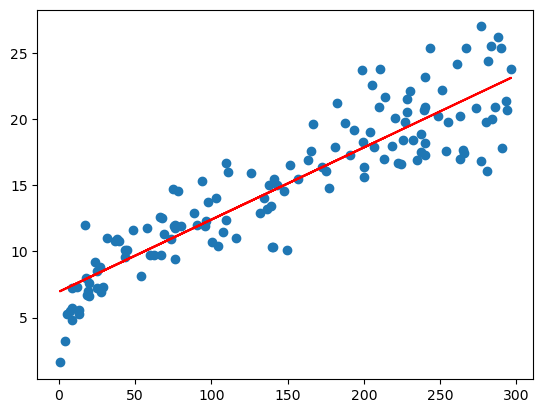

In [44]:
# predict y
y_train_pred = lr_model.predict(X_train_sm)

y_train_pred
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show

C:\Users\AminuMohammedTwumasi\AppData\Local\Temp\ipykernel_10836\3484693499.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residual Plot')

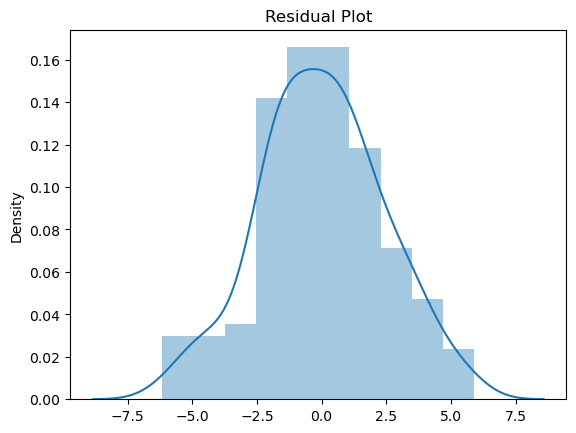

In [46]:
# check residuals
res = y_train - y_train_pred

# plot residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

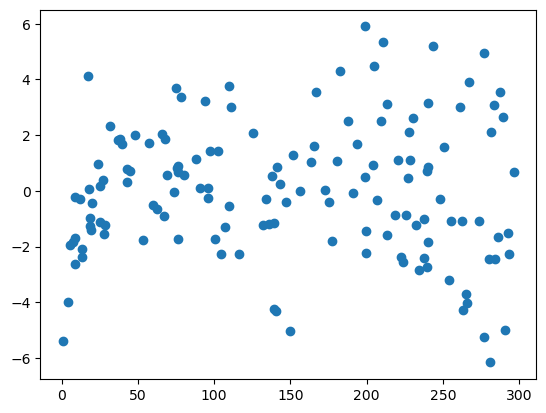

In [47]:
# observe patterns in residuals
# we should not be able to identify
plt.scatter(X_train, res)
plt.show()

> Based on the plot, the model is good enough as no sort of identifiable patterns can be seen between the residuals (they are normally distributed)

#### 4. Predictions and Evaluations on the Test set
- predictions on the test set (`y_test_pred`)
- evaluate the model (we can use `r-squared`)

In [50]:
# add a const/intercept to the X_test
X_test_sm = sm.add_constant(X_test)

# predictions on test set
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [52]:
# import from sklearn to compute r-squared
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [81]:
# evaluate the model, r-squared on the test set
test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
test_r2

0.7921031601245662

In [82]:
# evaluate the model, r-squared on the train set
train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
train_r2

0.8157933136480389

In [55]:
# mean-squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

<function matplotlib.pyplot.show(close=None, block=None)>

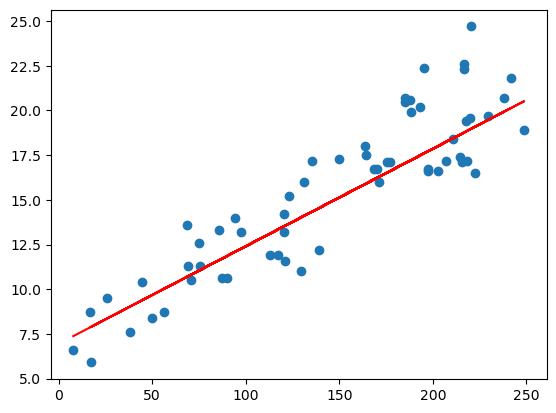

In [56]:
# visualize the training dataset
plt.scatter(X_test, y_test)

# visualize predicted regression line
plt.plot(X_test, y_test_pred, 'r')
plt.show

## Linear Regression using **`sklearn`**
> Steps:
> - create an object of linear regression
> - fit the model
> - see the params, make predictions (train, test)
> - evalaute (r2, etc.)

In [57]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [58]:
# import LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

In [65]:
# create an instance of the LinearRegression class `lm`
lm = LinearRegression()

In [66]:
# reshape X_train, X_test -> this resolves issues during the model fit which expects a 2D array
X_train_lm = X_train.values.reshape(-1, 1)
X_train_lm.shape
X_test_lm = X_test.values.reshape(-1, 1)
X_test_lm.shape

(60, 1)

In [67]:
# fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [75]:
# see params
print("sklearn params")
print(lm.intercept_)
print(lm.coef_)
print()

# compare to params under statsmodels
print("statsmodels params")
print(lr_model.params)

sklearn params
6.948683200001357
[0.05454575]

statsmodels params
const    6.948683
TV       0.054546
dtype: float64


In [76]:
# make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [84]:
# evaluate the model
print("sklearn")
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))
print()

# compare to evaluation of statsmodels
print("statsmodels")
print(train_r2)
print(test_r2)

sklearn
0.8157933136480389
0.7921031601245662

statsmodels
0.8157933136480389
0.7921031601245662
